## Contents
### 1. Importing libraries and data
### 2. Data consistency checks
### 3. Exploring relationships through visualisations
#### Correlation heatmap
#### Scatter plots
#### Pair plots
#### Categorical plots
### 4. Orginal questions
### 5. Hypotheses

## 1. Importing libraries and data

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Check matplotlib version
matplotlib.__version__

'3.5.1'

In [3]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Define path for file retreival

path = 'C:/Users/ruthf/OneDrive/Documents/Data Immersion/Achievement 6'

In [5]:
# Import data

# df = pd.read_excel(os.path.join(path, 'Project', '02 Data', '1. Original Data', 'StockX_data_add_columns.xlsx'))

df = pd.read_excel(r"C:\Users\ruthf\OneDrive\Documents\Data Immersion\Achievement 6\Project\02 Data\1. Orignal Data\StockX_data_add_columns.xlsx",
                  index_col=False)

# "C:\Users\ruthf\OneDrive\Documents\Data Immersion\Achievement 6\Project\02 Data\1. Orignal Data\StockX_data_add_columns.xlsx"

## 2. Data consistency checks

In [6]:
# Check shape
df.shape

(99956, 13)

In [7]:
# Check head
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit %,Release Year,Sold Year,Days since release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,3.986364,2016,2017,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0,2.113636,2016,2017,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0,2.136364,2016,2017,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0,3.886364,2016,2017,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0,2.763636,2017,2017,202


In [8]:
# Check dtypes
df.dtypes

Order Date            datetime64[ns]
Brand                         object
Sneaker Name                  object
Sale Price                   float64
Retail Price                   int64
Release Date          datetime64[ns]
Shoe Size                    float64
Buyer Region                  object
Profit                       float64
Profit %                     float64
Release Year                   int64
Sold Year                      int64
Days since release             int64
dtype: object

In [9]:
# Check for mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)
    

In [10]:
# Check for missing values
df.isnull().sum()

Order Date            0
Brand                 0
Sneaker Name          0
Sale Price            0
Retail Price          0
Release Date          0
Shoe Size             0
Buyer Region          0
Profit                0
Profit %              0
Release Year          0
Sold Year             0
Days since release    0
dtype: int64

In [11]:
# Check descriptive stats
df.describe()

,Sale Price,Retail Price,Shoe Size,Profit,Profit %,Release Year,Sold Year,Days since release
count,99956.000000,99956.00000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000,99956.000000
mean,446.634754,208.61359,9.344181,238.021164,1.248245,2017.467246,2018.029013,183.708722
std,255.982918,25.20001,2.329588,266.133127,1.508563,0.579352,0.542357,232.354142
min,186.000000,130.00000,3.500000,-34.000000,-0.154545,2015.000000,2017.000000,-69.000000
25%,275.000000,220.00000,8.000000,58.000000,0.263636,2017.000000,2018.000000,10.000000
50%,370.000000,220.00000,9.500000,154.000000,0.704545,2017.000000,2018.000000,56.000000
75%,540.000000,220.00000,11.000000,342.000000,1.613636,2018.000000,2018.000000,345.000000
max,4050.000000,250.00000,17.000000,3860.000000,20.315789,2019.000000,2019.000000,1321.000000


## 3. Exploring relationships through visualisation

In [12]:
# Produce correlation matrix
df.corr()

,Sale Price,Retail Price,Shoe Size,Profit,Profit %,Release Year,Sold Year,Days since release
Sale Price,1.000000,-0.361549,0.082795,0.996095,0.960253,-0.049631,-0.127846,-0.086407
Retail Price,-0.361549,1.000000,-0.052798,-0.442450,-0.588700,-0.318410,-0.052630,0.245391
Shoe Size,0.082795,-0.052798,1.000000,0.084637,0.082967,-0.042035,-0.061312,0.017450
Profit,0.996095,-0.442450,0.084637,1.000000,0.979373,-0.017588,-0.117986,-0.106347
Profit %,0.960253,-0.588700,0.082967,0.979373,1.000000,0.044810,-0.092908,-0.134612
Release Year,-0.049631,-0.318410,-0.042035,-0.017588,0.044810,1.000000,0.389080,-0.637876
Sold Year,-0.127846,-0.052630,-0.061312,-0.117986,-0.092908,0.389080,1.000000,0.138915
Days since release,-0.086407,0.245391,0.017450,-0.106347,-0.134612,-0.637876,0.138915,1.000000


### Correlation heatmap

#### Create correlation heatmap using seaborn

In [13]:
# Create df with only useful columns
sub = df[['Sale Price','Retail Price','Shoe Size','Profit', 'Days since release']]

In [14]:
sub

,Sale Price,Retail Price,Shoe Size,Profit,Days since release
0,1097.0,220,11.0,877.0,342
1,685.0,220,11.0,465.0,282
2,690.0,220,11.0,470.0,282
3,1075.0,220,11.5,855.0,282
4,828.0,220,11.0,608.0,202
...,...,...,...,...,...
99951,565.0,220,8.0,345.0,49
99952,598.0,220,8.5,378.0,49
99953,605.0,220,5.5,385.0,49
99954,650.0,220,11.0,430.0,49


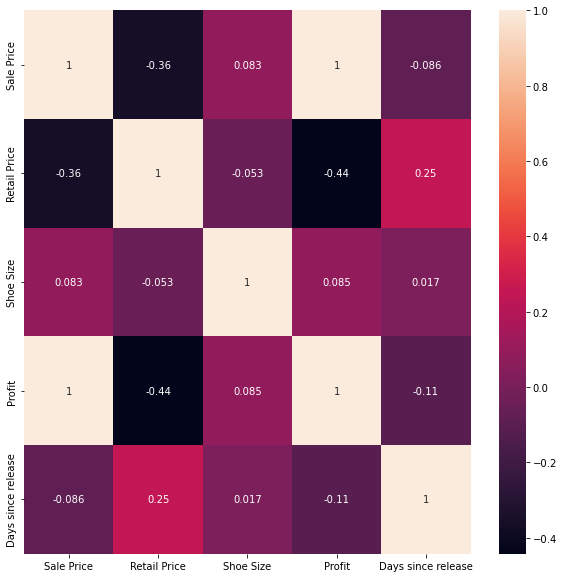

In [15]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

#### The strongest correlation is between sale price and profit, which is to be expected as the retail prices don't have a large range.  Looking at the sale price there do not appear to be any strong correlations with any of the variables.  
#### The -0.36 coefficient between sale price and retail price suggests a moderate negative relationship.  Meaning that as the retail price goes up the sale price actually goes down.  This is further evident in the -0.44 coefficient between retail price and profit.
#### The 0.25 coefficient between days since release and retail price indicates a weak correlation.  Meaning the higher the retail price, the longer you need to wait for the sneaker to resell.

In [60]:
# Save map
plt.savefig("matrix.png") 

<Figure size 432x288 with 0 Axes>

In [61]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\ruthf\\OneDrive\\Documents\\Data Immersion\\Achievement 6\\Project\\03 Scripts'

### Scatter plots

In [15]:
# Colour pallette
sns.set_palette('Accent')

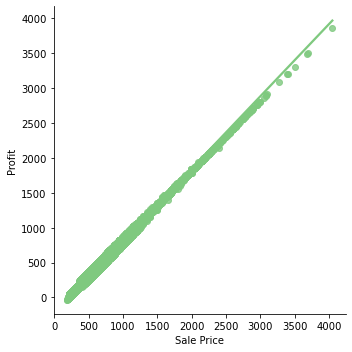

In [16]:
# Sales price and profit
sns.lmplot(x = 'Sale Price', y = 'Profit', data = df)


#### As we would expect the higher the sale price, the higher the profit.

In [ ]:
# Save viz
plt.savefig("--.png") 

In [22]:
# Create separate dfs by brand

#yeezy = df[df['Brand']=='Yeezy']

df['Brand'].value_counts()

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

In [26]:
yeezy=df[df['Brand']==' Yeezy']
yeezy

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit %,Release Year,Sold Year,Days since release
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097.0,220,2016-09-24,11.0,California,877.0,3.986364,2016,2017,342
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685.0,220,2016-11-23,11.0,California,465.0,2.113636,2016,2017,282
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690.0,220,2016-11-23,11.0,California,470.0,2.136364,2016,2017,282
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075.0,220,2016-11-23,11.5,Kentucky,855.0,3.886364,2016,2017,282
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828.0,220,2017-02-11,11.0,Rhode Island,608.0,2.763636,2017,2017,202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,565.0,220,2018-12-26,8.0,Oregon,345.0,1.568182,2018,2019,49
99952,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,598.0,220,2018-12-26,8.5,California,378.0,1.718182,2018,2019,49
99953,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,605.0,220,2018-12-26,5.5,New York,385.0,1.750000,2018,2019,49
99954,2019-02-13,Yeezy,adidas-Yeezy-Boost-350-V2-Static-Reflective,650.0,220,2018-12-26,11.0,California,430.0,1.954545,2018,2019,49


In [28]:
off_white = df[df['Brand']=='Off-White']
off_white

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Profit,Profit %,Release Year,Sold Year,Days since release
128,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1600.0,160,2017-09-09,8.0,California,1440.0,9.000000,2017,2017,-2
129,2017-09-07,Off-White,Nike-Air-Max-90-Off-White,1090.0,160,2017-09-09,11.5,New York,930.0,5.812500,2017,2017,-2
130,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1344.0,160,2017-09-09,10.0,New York,1184.0,7.400000,2017,2017,-2
131,2017-09-07,Off-White,Nike-Air-Presto-Off-White,1325.0,160,2017-09-09,10.0,Massachusetts,1165.0,7.281250,2017,2017,-2
132,2017-09-07,Off-White,Nike-Air-VaporMax-Off-White,1800.0,250,2017-09-09,12.0,Kentucky,1550.0,6.200000,2017,2017,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99869,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,265.0,170,2018-11-28,11.0,New York,95.0,0.558824,2018,2019,77
99870,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,331.0,170,2018-11-28,4.0,California,161.0,0.947059,2018,2019,77
99871,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,405.0,170,2018-11-28,6.0,New York,235.0,1.382353,2018,2019,77
99872,2019-02-13,Off-White,Nike-Zoom-Fly-Off-White-Pink,263.0,170,2018-11-28,10.0,Maryland,93.0,0.547059,2018,2019,77


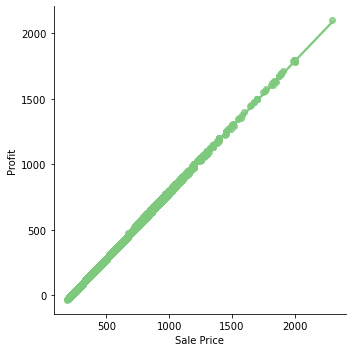

In [29]:
# Yeezy Sales price and profit
sns.lmplot(x = 'Sale Price', y = 'Profit', data = yeezy)

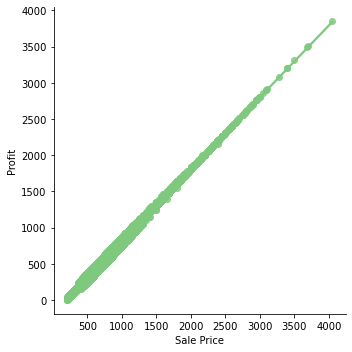

In [30]:
# Off White Sales price and profit
sns.lmplot(x = 'Sale Price', y = 'Profit', data = off_white)

#### This trend is mirrored for both brands and we can immediately see that Off Whites sell for more money (upto 4,000) and therefore generate a higher profit.

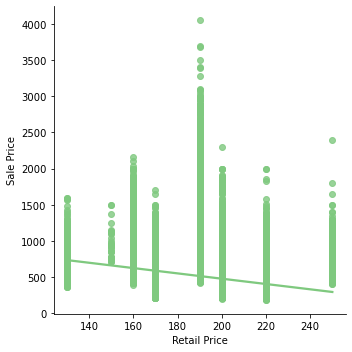

In [23]:
# Retail price and sale price
sns.lmplot(x = 'Retail Price', y = 'Sale Price', data = df)

#### Although the trend line is downward and does indicate that as the retail price increases the sale price decreases the data points are not clustered near the line, so this can not be seen to be a strong relationship.

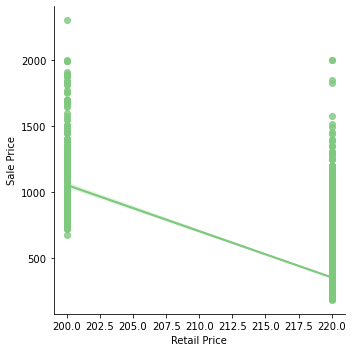

In [31]:
# Yeezy Retail price and sale price
sns.lmplot(x = 'Retail Price', y = 'Sale Price', data = yeezy)

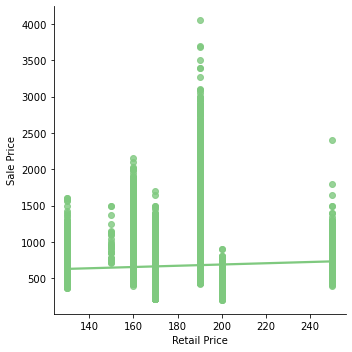

In [32]:
# Off White Retail price and sale price
sns.lmplot(x = 'Retail Price', y = 'Sale Price', data = off_white)

In [ ]:
# Upon splitting this out by brand we can see that the downward trend is being driven by Yeezy.

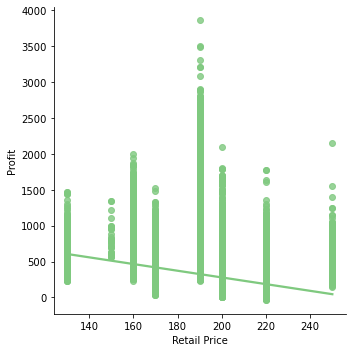

In [33]:
# Retail price and profit
sns.lmplot(x = 'Retail Price', y = 'Profit', data = df)

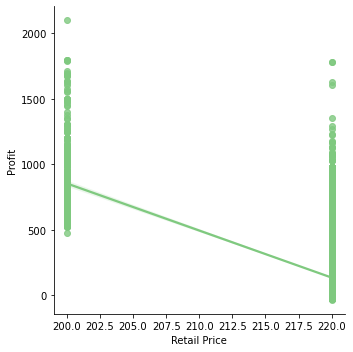

In [34]:
# Yeezy Retail price and profit
sns.lmplot(x = 'Retail Price', y = 'Profit', data = yeezy)

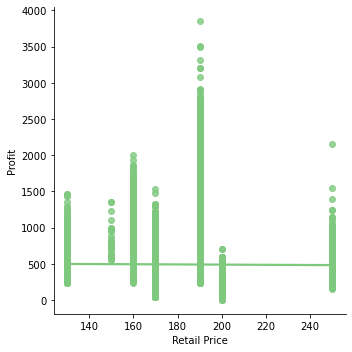

In [35]:
# Off White Retail price and profit
sns.lmplot(x = 'Retail Price', y = 'Profit', data = off_white)

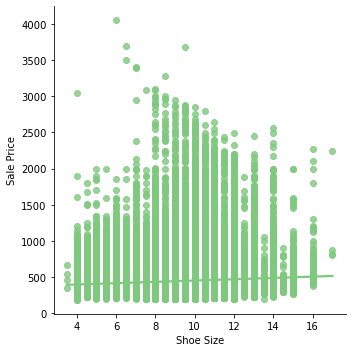

In [25]:
# Sale price and shoe size
sns.lmplot( x = 'Shoe Size', y = 'Sale Price', data = sub)

#### There is no clear trend or relationship identified here between sale price and shoe size.  In fact, the trend lind is relatively flat.  Although initial interpretation would identify sizes 8-10 to have the highest sales price.  There are however some outliers.

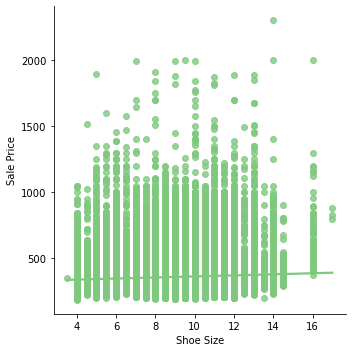

In [36]:
# Yeezy Sale price and shoe size
sns.lmplot( x = 'Shoe Size', y = 'Sale Price', data = yeezy)

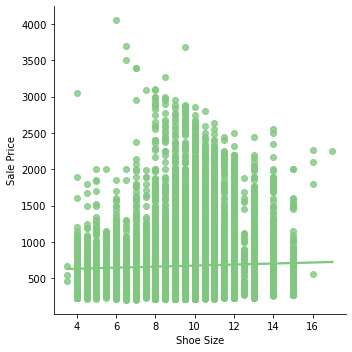

In [37]:
# Off White Sale price and shoe size
sns.lmplot( x = 'Shoe Size', y = 'Sale Price', data = off_white)

In [28]:
sns.set_palette('Paired')

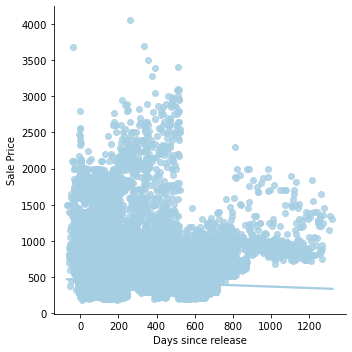

In [29]:
# Sale price and days since release
sp1 = sns.lmplot(x = 'Days since release', y = 'Sale Price', data = df)

#### The trend line here only shows a slight down trend meaning there is no correlation (coefficient of -0.086) visible between sale price and days since release.  This means there is no linear trend but we can see that after a dip in sales price at around 500 days the price begins to increase again after 800 days.  Known as a polynominal trend.

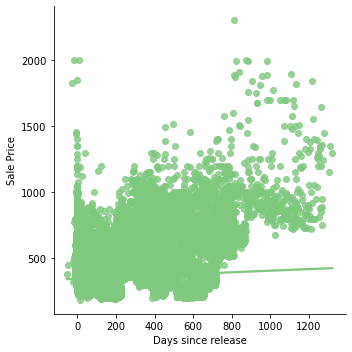

In [38]:
# Yeezy Sale price and days since release
sp2 = sns.lmplot(x = 'Days since release', y = 'Sale Price', data = yeezy)

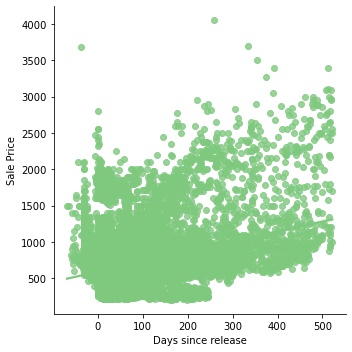

In [39]:
# Off White Sale price and days since release
sp2 = sns.lmplot(x = 'Days since release', y = 'Sale Price', data = off_white)

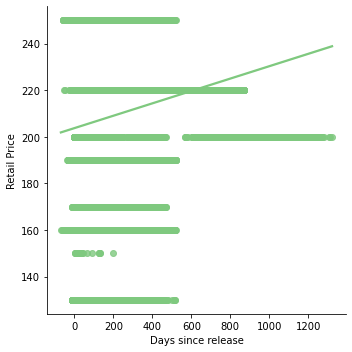

In [40]:
# Retail Price and days since release
sns.lmplot(x = 'Days since release', y = 'Retail Price', data = df)

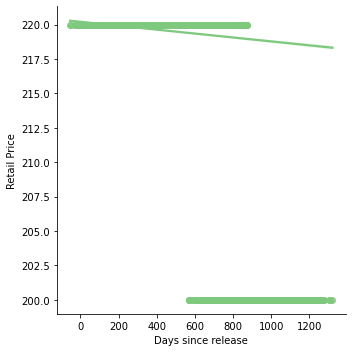

In [41]:
# Yeezy Retail Price and days since release
sns.lmplot(x = 'Days since release', y = 'Retail Price', data = yeezy)

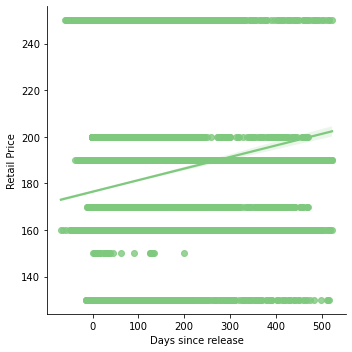

In [42]:
# Off White Retail Price and days since release
sns.lmplot(x = 'Days since release', y = 'Retail Price', data = off_white)

#### There is an upward trend line here indicating that the higher the retail price the higher the number of days between release and sale.  Suggesting that the higher the retail price of a sneaker the longer you have to wait to resell.  Although this isn't a strong correlation as the data points are not clustered around the line it would be interesting to investigate further.

### Pair plot

In [31]:
sub.columns

Index(['Sale Price', 'Retail Price', 'Shoe Size', 'Profit',
       'Days since release'],
      dtype='object')

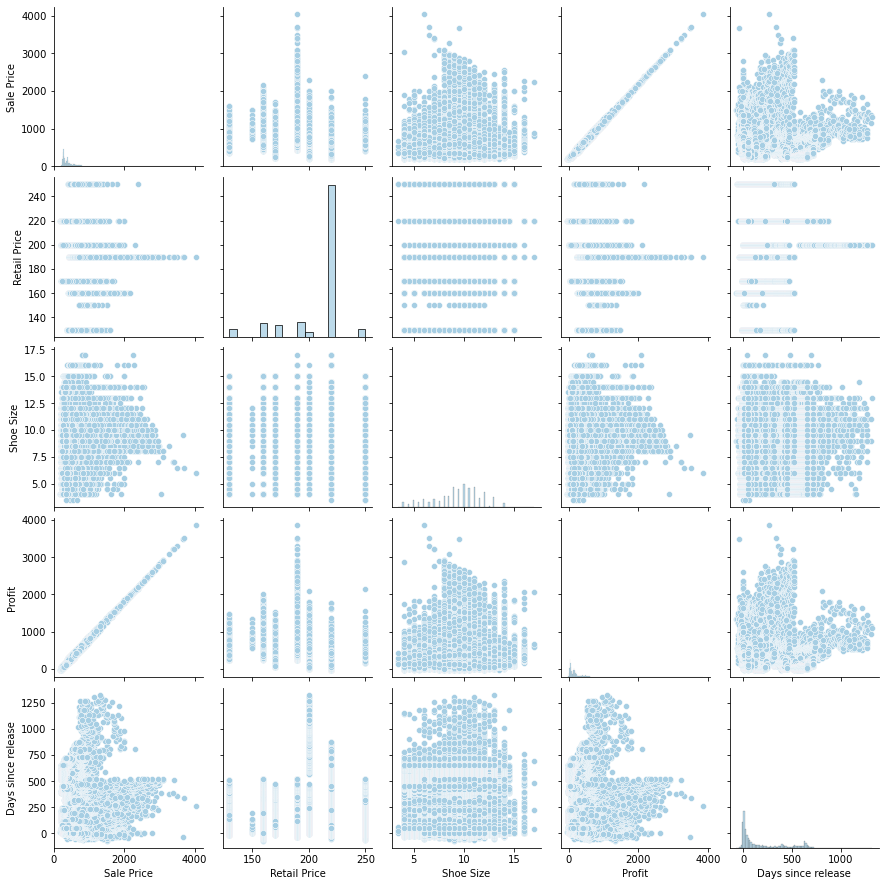

In [32]:
# Create pairplot
sns.pairplot(sub)

#### No further relationships can be identified here.  I would like to further explore sales price and days since release as identified earlier there appears to be a polynominal trend.

### Categorical plot

<AxesSubplot:xlabel='Days since release', ylabel='Count'>

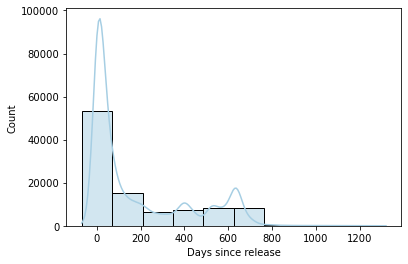

In [33]:
# Create histogram on days since release
sns.histplot(df['Days since release'], bins = 10, kde = True)

In [51]:
# Before release <0
# 0-100
# 100-182
#183-365
#365-730
#>730


In [35]:
# Creating new column for period between release and sale

df.loc[df['Days since release']<0, 'Period release to order'] = 'Before release'

In [36]:
df.loc[(df['Days since release']>=0) & (df['Days since release']<183), 'Period release to order'] = '6 months'

In [37]:
df.loc[(df['Days since release']>=183) & (df['Days since release']<=365), 'Period release to order'] = '6-12 months'

In [38]:
df.loc[(df['Days since release']>365) & (df['Days since release']<=730), 'Period release to order'] = '1-2 years'

In [39]:
df.loc[df['Days since release']>730, 'Period release to order'] = 'Over 2 years'

In [40]:
# Check value counts
df['Period release to order'].value_counts()

6 months          61132
1-2 years         23453
6-12 months        9038
Before release     5601
Over 2 years        732
Name: Period release to order, dtype: int64

In [41]:
# Check for mixed data types
for col in df.columns.tolist():
  weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df[weird]) > 0:
    print (col)

In [42]:
#Here I create a sub dataframe which only have 3 columns: "Sale Price", "Days since release" and "Period release to order"

df1=df[["Sale Price", "Days since release", "Period release to order"]]

In [43]:
df1.head()

,Sale Price,Days since release,Period release to order
0,1097.0,342,6-12 months
1,685.0,282,6-12 months
2,690.0,282,6-12 months
3,1075.0,282,6-12 months
4,828.0,202,6-12 months


In [52]:
# Create subset of data to produce cat plot
np.random.seed(4)
dev=np.random.rand(len(df1))<=0.9

In [53]:
big=df1[dev]
small=df1[~dev]

In [54]:
len(big)+len(small)

99956

In [55]:
small.shape

(10173, 3)

#### Catplot run on a 10% sample set of data.

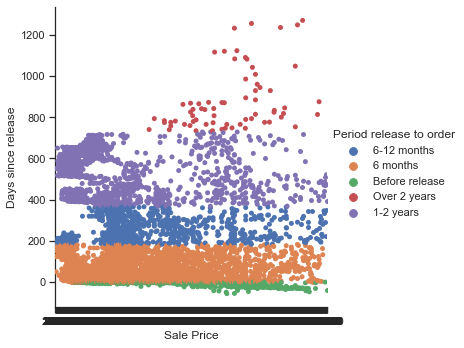

In [56]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Sale Price", y="Days since release", hue="Period release to order", data=small)

In [59]:
plt.savefig('CP10.png')

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='Retail Price', ylabel='Count'>

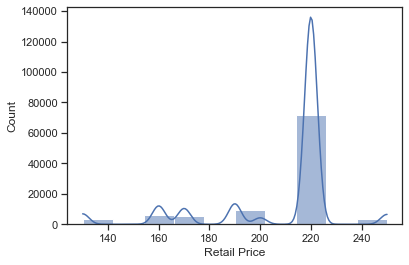

In [34]:

sns.histplot(df['Retail Price'], bins = 10, kde = True)

<AxesSubplot:xlabel='Sale Price', ylabel='Count'>

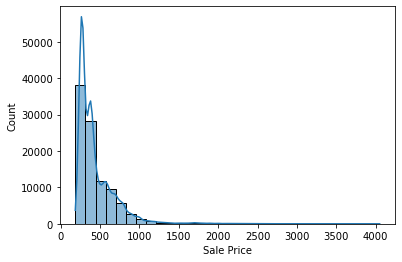

In [30]:
# Create histogram of sale price to determine categories
sns.histplot(df['Sale Price'], bins = 30, kde = True)

In [ ]:
# <300
# 300-550
#550+

In [31]:
# Create new sale price category column
#df.loc[df['Price per unit'] < 20, 'Price category'] = 'Low price'
df.loc[df['Sale Price']<300, 'Sale Price Category'] = 'Low price'
df.loc[(df['Sale Price']>=300) & (df['Sale Price']<=600), 'Sale Price Category'] = 'Mid price'
df.loc[df['Sale Price']>600, 'Sale Price Category'] = 'High Price'

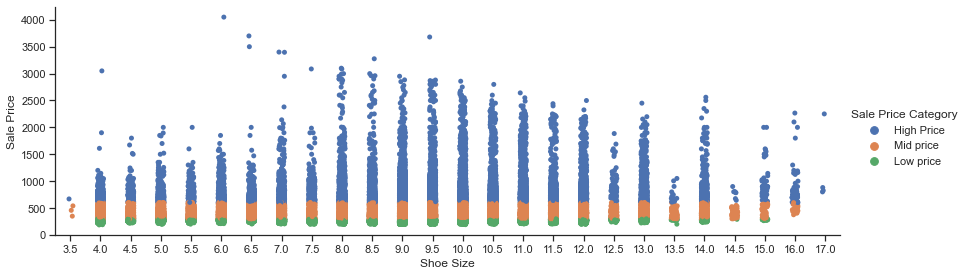

In [37]:
# Create a categorical plot in seaborn on shoe size and sale price using the price categories created above
# height = 4, aspect = 3 widen the x axis so sizes don't overlap
sns.set(style="ticks")
g = sns.catplot(x="Shoe Size", y="Sale Price", hue="Sale Price Category", data=df, height=4, aspect = 3)



In [62]:
# Save plot
plt.savefig("CP_size.png") 

<Figure size 432x288 with 0 Axes>

#### Further to what was identified earlier we can see that sizes 8-10 generally sell for the highest price.  There are a higher amount of high price sales for sizes 9-11.  For extreme sizes over 14.5 there are very little sales in the low price category.  This could be driven by availability as there are typically less of these sizes produced and therefore buyers will pay a premium.

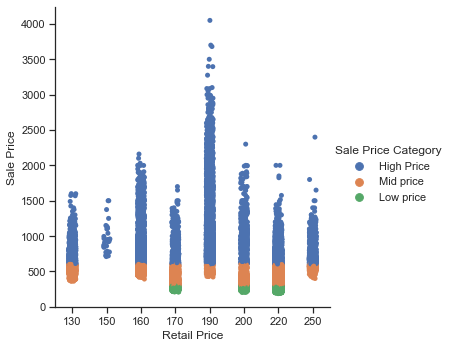

In [41]:
# Create a categorical plot in seaborn on retail price and sale price using the price categories created above

sns.set(style="ticks")
cat_RP_SP = sns.catplot(x="Retail Price", y="Sale Price", hue="Sale Price Category", data=df)

In [63]:
# Save Plot
plt.savefig("CP_rprice.png") 

<Figure size 432x288 with 0 Axes>

#### Interestingly it appears that sneakers with a lower retail price are less likely to resell at a low price.  Although there are exceptions (190 and 250) sneakers with a retail of 170 and above have a higher number of sales in the low price category.  The majority of sneakers with a retail of 190 sold at a high price.  This will need to be investigated further as we can not say that retail price is the only variable influencing these high price sales.

## 4. Original Questions
### 1. Is there a correlation between retail price and resell price?
#### The -0.36 coefficient between sale price and retail price suggests a moderate negative relationship. Meaning that as the retail price goes up the sale price actually goes down.  Although the correlation is not strong enough to draw significant conslusions it appears that retail price is not the only variable that determines the resell price and further analysis will be needed.
### 2. How long after the release date is the best time to sell a sneaker for the best profit?
#### There is no correlation (coefficient of -0.086) or linear trend between the sale price and days since release variables.  However the scatter plot showed a polynominal trend meaning sales prices were high initially and fell after 500 days they then began to increase after 800 days. 
### 3. Is there a correlation between shoe size and resell price?
#### No relationship was found between these two variables (0.083 coefficient).  However we have identified that certain sizes sell more and at ahigher price point than others.

## 5. Hypothesis
#### Selling a sneaker within 6 months of release will give the highest sale price.
#### If a sneaker has a retail price of 220 it will sell for a low price.
#### Sizes 8-10 are the most profitable sizes
